Black Friday Dataset EDA And Feature Engineering

##### This model can be integrated to:

A recommendation system (e.g. suggest products based on predicted spend).

A marketing engine (e.g. customers with high predicted purchase get smaller discounts, low predicted purchase get higher offers).

Customer segmentation dashboards (for business analysts).

So — it’s basically a regression model powering personalised marketing

#### The goal of the model is to predict the purchase amount a customer is likely to spend on a product, based on demographics and product details. These predictions help the company personalise offers, target marketing more effectively, and understand customer purchasing patterns across product categories.”

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem Statement
##### A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

##### Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [3]:
#importing the dataset
df_train=pd.read_csv('blackFriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
##  import the test data
df_test=pd.read_csv('blackFriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
##MErge both train and test data
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
##Basic 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.drop(['User_ID'],axis=1,inplace=True)

In [9]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
##HAndling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
## Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [13]:
'''##second technqiue
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()
'''

"##second technqiue\nfrom sklearn import preprocessing\n \n# label_encoder object knows how to understand word labels.\nlabel_encoder = preprocessing.LabelEncoder()\n \n# Encode labels in column 'species'.\ndf['Age']= label_encoder.fit_transform(df['Age'])\n \ndf['Age'].unique()\n"

In [14]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
##fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [16]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [17]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [18]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [19]:

## Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [20]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [22]:

df['Product_Category_2'].mode()[0]

8.0

In [23]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [24]:
df['Product_Category_2'].isnull().sum()

0

In [25]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [26]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [27]:

## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [28]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,False,True


In [29]:
df.shape

(783667, 12)

In [30]:

df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [31]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [32]:

df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,False,True


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(2)
memory usage: 61.3+ MB


In [34]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(6), object(1)
memory usage: 61.3+ MB


In [35]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

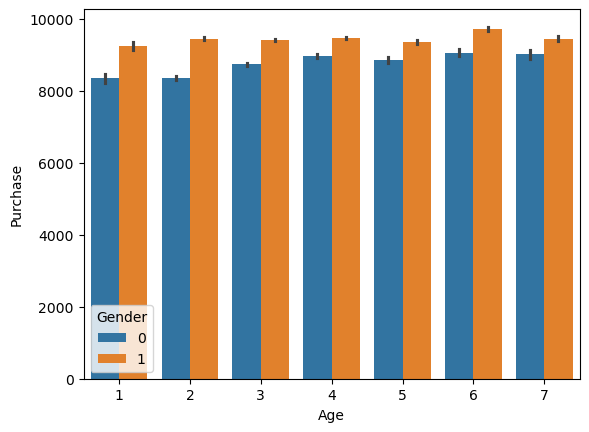

In [37]:
##Visualisation Age vs Purchased
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

### Purchasing of men is high then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

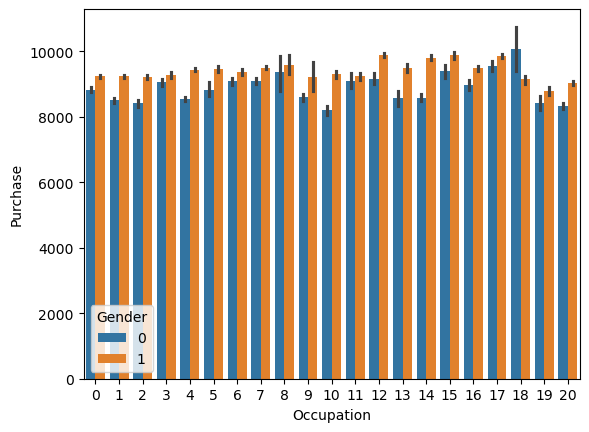

In [38]:

## Visualization of Purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)


In [39]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [40]:
# Split back into train/test by presence of target
df_train = df[~df['Purchase'].isnull()].copy()
df_holdout = df[df['Purchase'].isnull()].copy() 

# Features/target
X = df_train.drop(columns=['Purchase', 'Product_ID'], errors='ignore')  
y = df_train['Purchase'].astype(float)

##### Train Tets split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Linear Regression model

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

linreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

linreg_pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

#### Evaluation using RMSE as primary, plus MAE & R²

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

y_pred = linreg_pipe.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Linear Regression — RMSE: {rmse:,.0f} | MAE: {mae:,.0f} | R²: {r2:.3f}")


Linear Regression — RMSE: 4,674 | MAE: 3,576 | R²: 0.130


#### Regularised baseline that’s often stronger

In [44]:

from sklearn.linear_model import Ridge

ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0, random_state=42))
])

ridge_pipe.fit(X_train, y_train)
y_pred_ridge = ridge_pipe.predict(X_test)

rmse_r = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_r  = mean_absolute_error(y_test, y_pred_ridge)
r2_r   = r2_score(y_test, y_pred_ridge)

print(f"Ridge — RMSE: {rmse_r:,.0f} | MAE: {mae_r:,.0f} | R²: {r2_r:.3f}")




Ridge — RMSE: 4,674 | MAE: 3,576 | R²: 0.130


In [45]:
# Get coefficient importances for the ridge model
coefs = pd.Series(ridge_pipe.named_steps["model"].coef_, index=X.columns).sort_values(key=abs, ascending=False)
coefs.head(10)


Product_Category_1           -1587.941569
Product_Category_3            -424.486954
C                              306.906055
Gender                         224.827654
Age                            162.134701
B                               76.431577
Occupation                      40.950217
Marital_Status                 -25.442274
Stay_In_Current_City_Years      11.947959
Product_Category_2              -7.870718
dtype: float64

### 🔍 Model 1: Linear Regression (Baseline)
- **Results:**  
  - RMSE: ~4,674  
  - MAE: ~3,576  
  - R²: 0.13  

**Interpretation:**  
The baseline linear model explains about **13% of variance** in purchase amount.  
This is expected because customer spending behaviour is **nonlinear and influenced by complex feature interactions** (e.g., Age × Product_Category).  

**Insights from Coefficients:**  
- Customers in **City C** and **males** tend to spend slightly more.  
- **Older age groups** also show higher spending.  
- **Product Category 1** has the strongest negative effect on purchase amount.  

**Conclusion:**  
Model is directionally meaningful but not highly predictive.  


#### XGBoost

In [46]:
#pip install xgboost

In [ ]:
#pip install "xgboost==2.1.1" "scikit-learn==1.5.2"

In [50]:
import xgboost as xgb

Step A

In [56]:
# Ensure pure numeric arrays
Xtr = np.asarray(X_train, dtype=float)
Xva = np.asarray(X_test, dtype=float)
ytr = np.asarray(y_train, dtype=float)
yva = np.asarray(y_test, dtype=float)

dtrain = xgb.DMatrix(Xtr, label=ytr)
dtest = xgb.DMatrix(Xva, label=yva)

params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.03,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "tree_method": "hist",
    "seed": 42,
}

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,
    evals=[(dtrain, "train"), (dtest, "test")],
    early_stopping_rounds=100,
    verbose_eval=False,
)

best_iters = bst.best_iteration + 1  # +1 because it’s zero-based
print("Best boosting rounds:", best_iters)

Best boosting rounds: 2000


In [ ]:
# Evaluate on valid
y_pred = bst.predict(dtest)
rmse = math.sqrt(mean_squared_error(yva, y_pred)) 
mae = mean_absolute_error(yva, y_pred)
r2 = r2_score(yva, y_pred)
print(f"XGB native — RMSE: {rmse:,.0f} | MAE: {mae:,.0f} | R²: {r2:.3f}")

XGB native — RMSE: 2,895 | MAE: 2,161 | R²: 0.666


Step B

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import math
import numpy as np

best_n = best_iters

xgb_sklearn = xgb.XGBRegressor(
    n_estimators=best_n,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    # note: no early_stopping args here
)

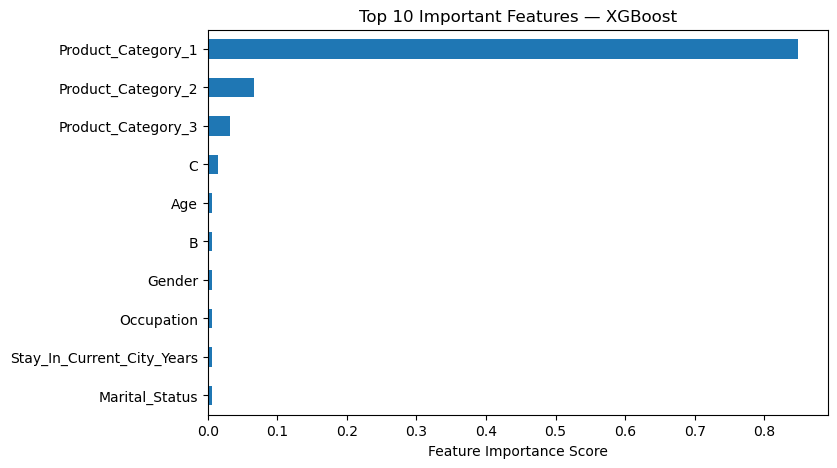

Product_Category_1            0.848726
Product_Category_2            0.066037
Product_Category_3            0.032463
C                             0.014777
Age                           0.006862
B                             0.006684
Gender                        0.006410
Occupation                    0.006137
Stay_In_Current_City_Years    0.006106
Marital_Status                0.005798
dtype: float32

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importance = pd.Series(xgb_sklearn.feature_importances_, index=X_train.columns)
importance = importance.sort_values(ascending=False)

# Plot top 10
plt.figure(figsize=(8, 5))
importance.head(10).plot(kind='barh')
plt.title("Top 10 Important Features — XGBoost")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.show()


importance.head(10)

##### Feature importance revealed that Product_Category_1 contributes around 85% of the model’s predictive power, indicating product type is the key determinant of purchase amount. Demographics such as city type, age, and gender provide additional context but have smaller effects. This behaviour is realistic — in retail data, transaction value is primarily driven by product attributes rather than just customer demographics

In [ ]:
# for local evaluation
xgb_sklearn.fit(X_train, y_train)

y_pred_s = xgb_sklearn.predict(X_test)

rmse_s = math.sqrt(mean_squared_error(y_test, y_pred_s)); 
mae_s = mean_absolute_error(y_test, y_pred_s); 
r2_s = r2_score(y_test, y_pred_s)
print(f"XGB sklearn (best_n) — RMSE: {rmse_s:,.0f} | MAE: {mae_s:,.0f} | R²: {r2_s:.3f}")

XGB sklearn (best_n) — RMSE: 2,895 | MAE: 2,161 | R²: 0.666


### Model 2: XGBoost (Refined Using Early Stopping)

- **Goal:** Improve prediction of customer purchase amount by capturing nonlinear relationships.
- **Results:**
  - RMSE: ~2,895
  - MAE: ~2,161
  - R²: 0.666

**Conclusion :**
Compared to Linear Regression (RMSE 4,674, R² 0.13), XGBoost reduced prediction error by ~38% and explained two-thirds of target variance.  
This confirms that purchase behaviour depends on nonlinear feature interactions such as Age × City_Category × Product_Category.
Model is significantly more accurate and ready for use in generating personalised offers or spend predictions.  
Next step: validate feature importance and prepare for deployment.


,Model,RMSE,MAE,R2
0,Linear/Ridge,4674.386582,3575.519636,0.130393
1,XGBoost,2894.871004,2160.697406,0.666472


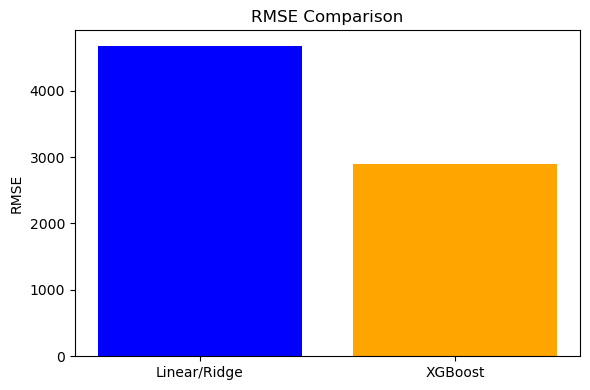

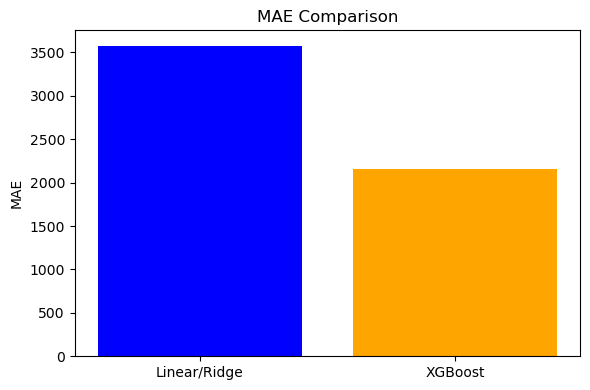

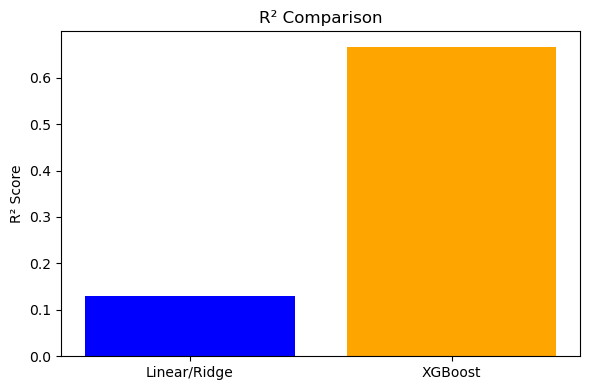

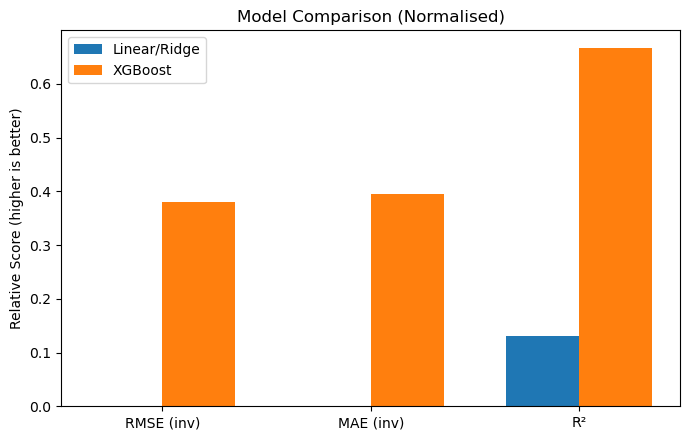

In [72]:
import matplotlib.pyplot as plt

# Combine both model metrics dynamically
metrics_df = pd.DataFrame({
    "Model": ["Linear/Ridge", "XGBoost"],
    "RMSE": [rmse_r, rmse_s],
    "MAE": [mae_r, mae_s],
    "R2": [r2_r, r2_s]
})

# Display comparison table
display(metrics_df)

# === Individual Metric Plots ===

# RMSE
plt.figure(figsize=(6, 4))
plt.bar(metrics_df["Model"], metrics_df["RMSE"], color=["blue", "orange"])
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

# MAE
plt.figure(figsize=(6, 4))
plt.bar(metrics_df["Model"], metrics_df["MAE"], color=["blue", "orange"])
plt.title("MAE Comparison")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()

# R²
plt.figure(figsize=(6, 4))
plt.bar(metrics_df["Model"], metrics_df["R2"], color=["blue", "orange"])
plt.title("R² Comparison")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()

# === Combined Normalised View (Higher = Better) ===
norm_df = metrics_df.copy()

# invert RMSE/MAE so higher=better
for col in ["RMSE", "MAE"]:
    norm_df[col] = 1 - (norm_df[col] / norm_df[col].max())

metric_labels = ["RMSE (inv)", "MAE (inv)", "R²"]
x = np.arange(len(metric_labels))
width = 0.35

linear_scores = [norm_df.loc[0, "RMSE"], norm_df.loc[0, "MAE"], norm_df.loc[0, "R2"]]
xgb_scores = [norm_df.loc[1, "RMSE"], norm_df.loc[1, "MAE"], norm_df.loc[1, "R2"]]

plt.figure(figsize=(7, 4.5))
plt.bar(x - width/2, linear_scores, width, label="Linear/Ridge")
plt.bar(x + width/2, xgb_scores, width, label="XGBoost")
plt.xticks(x, metric_labels)
plt.ylabel("Relative Score (higher is better)")
plt.title("Model Comparison (Normalised)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:

# For production

X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)
xgb_sklearn.fit(X_full, y_full)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

Tune: max_depth, min_child_weight, subsample, colsample_bytree, gamma, reg_alpha, reg_lambda, learning_rate.

Use 5-fold CV with RMSE (scikit-learn scoring uses negative values).

In [62]:
import joblib
joblib.dump(xgb_sklearn, "xgb_purchase_model.joblib")
# Later:
# model = joblib.load("xgb_purchase_model.joblib")


['xgb_purchase_model.joblib']

Tree models require the same column order at inference. Storing it prevents accidental misalignment

In [63]:
import json
with open("xgb_purchase_model.columns.json", "w") as f:
    json.dump(list(X_full.columns), f)


In [64]:
def predict_purchase_amount(model, df_features, columns):
    X_in = df_features.reindex(columns=columns, fill_value=0)
    return model.predict(X_in)


In [73]:
pip install fastapi uvicorn joblib "xgboost==2.1.1" "scikit-learn==1.5.2" pydantic

Note: you may need to restart the kernel to use updated packages.
